## Calcul de la vitesse à partir d'un codeur incrémental

On suppose un système de contrôle de vitesse d'un moteur sur lequel un capteur incrémental est monté. Le capteur a une résolution de 500 stries.

Le système effectue le réglage à une période $T_s= 1[ms]$

Un timer permet de mesure le temps entre 2 transitions positives du signal A du capteur. Le timer mesure le temps à partir d'une horloge $f=1[MHz]$.

Un compteur compte les transitions des signaux A et B du capteur.

### Q1 Quelle est la précision relative en fonction de la vitesse de rotation pour chaque méthode

- Calculez l'expression de l'erreur
- Tracez un graphique avec les 2 courbes

### Q2 A quelle vitesse de rotation l'une des méthodes est avantageuse sur l'autre

- Quelle est la vitesse où l'erreur est la même ?
- Que se passe-t-il si la fréquence du compteur est de 100MHz ?

### Q3 Réflexion

- Quelles sont les sources d'erreur possibles
- Que se passe-t-il quand le moteur s'arrête




In [1]:
import sympy as sp

p1,p2,Ts,vm,R,f=sp.symbols("p1,p2,Ts,vm,R,f")
# Méthode différence de compteur
v=(p2-p1)/Ts # calcul de la vitesse
dp=vm/60*R*4*Ts # distance sur une période en fonction de la vitesse
epsilon_vd=1/dp*100 # erreur relative
# Méthode de mesure de fréquence
counter=60*f/vm/R
v=60/(counter/f*R) # calcul de la vitesse
epsilon_cnt=1/counter # résolution temporelle de mesure
epsilon_vt=(R*vm)/(60*f)*100

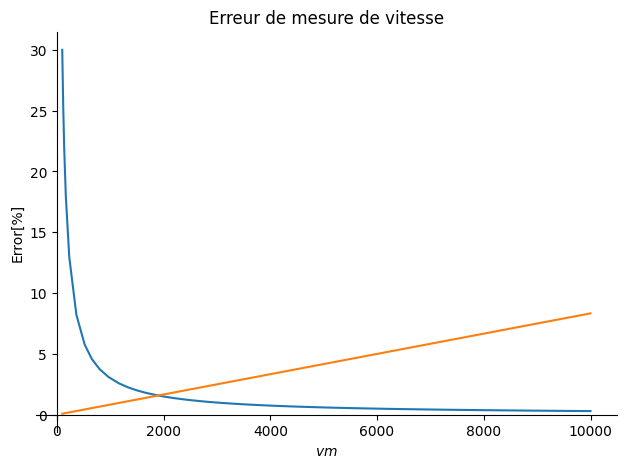

In [2]:
valeurs={R:500, Ts:1e-3, f:1e6}

sp.plot(epsilon_vd.subs(valeurs),epsilon_vt.subs(valeurs),(vm,100,10000), title="Erreur de mesure de vitesse", ylabel="Error[%]")

Autre approche : Calcul de l'erreur exacte

L'erreur exacte est calculée selon

$$ \epsilon_v = \frac{v(counter)-v(counter+1)}{v(counter)}$$ 

avec une valeur de compteur qui dépend de la vitesse : 
$$
counter=\frac{60 f}{vm R}
$$

In [11]:
counter=60*f/vm/R

Ev=(60/(counter/f*R)-60/((counter+1)/f*R))/(60/(counter/f*R))
Ev

(vm - 60*f/(R*(1 + 60*f/(R*vm))))/vm

In [12]:
Ev.subs(valeurs)

(vm - 120000.0/(1 + 120000.0/vm))/vm

In [13]:
sp.simplify(Ev)

R*vm/(R*vm + 60*f)

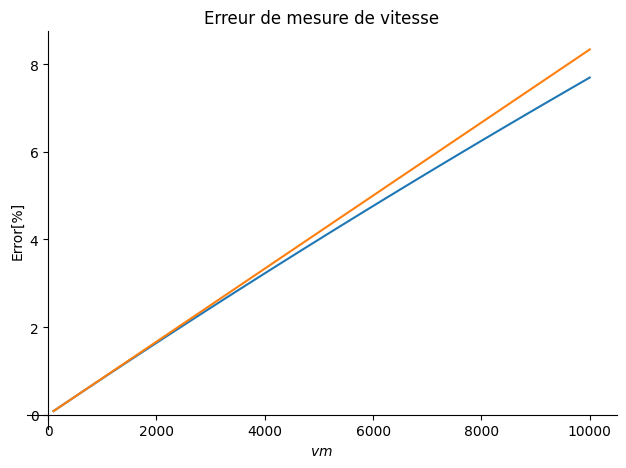

In [14]:
sp.plot(Ev.subs(valeurs)*100,epsilon_vt.subs(valeurs),(vm,100,10000), title="Erreur de mesure de vitesse", ylabel="Error[%]")